In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [8]:
df=pd.read_csv('house-prices.csv',index_col='Home',usecols=range(0,5))

Multi

In [20]:
df

,Price,SqFt,Bedrooms,Bathrooms
Home,,,,
1,114300,1790,2,2
2,114200,2030,4,2
3,114800,1740,3,2
4,94700,1980,3,2
5,119800,2130,3,3
...,...,...,...,...
124,119700,1900,3,3
125,147900,2160,4,3
126,113500,2070,2,2


In [10]:
df.corr()

,Price,SqFt,Bedrooms,Bathrooms
Price,1.000000,0.552982,0.525926,0.523258
SqFt,0.552982,1.000000,0.483807,0.522745
Bedrooms,0.525926,0.483807,1.000000,0.414556
Bathrooms,0.523258,0.522745,0.414556,1.000000


In [15]:
df.shape

(128, 4)

In [80]:
house_x_train,house_y_train=df[['SqFt','Bedrooms','Bathrooms']][:-28],df['Price'][:-28]

In [74]:
house_x_train,house_y_train=df[['SqFt','Bedrooms','Bathrooms']],df['Price']

In [81]:
house_x_test,house_y_test=df[['SqFt','Bedrooms','Bathrooms']][-28:],df['Price'][-28:]

In [82]:
linreg=linear_model.LinearRegression()

In [83]:
linreg.fit(house_x_train,house_y_train)

LinearRegression()

In [84]:
house_y_pred=linreg.predict(house_x_test)

In [85]:
print(f'Mean squared error {mean_squared_error(house_y_test,house_y_pred)}')

Mean squared error 487512584.4264124


In [40]:
pd.DataFrame({'col1':pd.Series(house_y_pred).reset_index(drop=True),'col2':pd.Series(house_y_test).reset_index(drop=True)})

,col1,col2
0,124722.245086,103200
1,149886.046710,123100
2,154971.750625,136800
3,166018.817131,211200
4,121331.775809,82300
5,169070.239480,146900
6,128790.808218,108500
7,120653.681954,134000
8,140731.779664,117000
9,128112.714362,108700


In [34]:
pd.Series(house_y_pred)

0     124722.245086
1     149886.046710
2     154971.750625
3     166018.817131
4     121331.775809
5     169070.239480
6     128790.808218
7     120653.681954
8     140731.779664
9     128112.714362
10    104520.911533
11    105538.052316
12    112318.990869
13    124383.198158
14    151439.799242
15    137680.357315
16    187650.667372
17    121670.822737
18    122687.963520
19    111640.897014
20    128667.572375
21    138697.498098
22    116387.554001
23    137680.357315
24    156525.503157
25    116726.600929
26    141748.920447
27    149546.999783
dtype: float64

<Axes: ylabel='Price'>

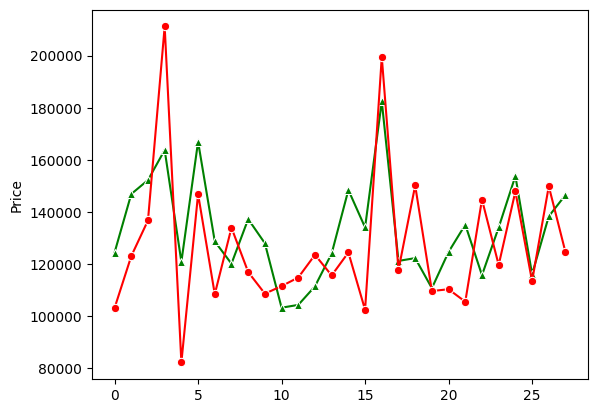

In [79]:
sns.lineplot(data=house_y_pred,marker='^',color='green')
sns.lineplot(data=house_y_test.reset_index(drop=True), marker='o', color='red')


<Axes: ylabel='Price'>

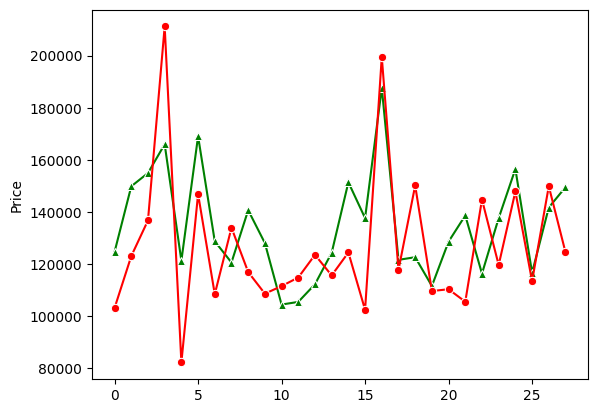

In [86]:
sns.lineplot(data=house_y_pred,marker='^',color='green')
sns.lineplot(data=house_y_test.reset_index(drop=True), marker='o', color='red')

Simple

In [87]:
house_x_train,house_y_train=df['SqFt'][:-28],df['Price'][:-28]

In [93]:
house_x_test,house_y_test=df[['SqFt']][-28:],df['Price'][-28:]

In [89]:
linreg=linear_model.LinearRegression()

In [91]:
linreg.fit(pd.DataFrame(house_x_train),pd.DataFrame(house_y_train))

LinearRegression()

In [143]:
house_y_pred=linreg.predict(house_x_test)

In [146]:
print(f'Mean squared error {mean_squared_error(house_y_test.to_list(),[x[-1] for x in house_y_pred])}')

Mean squared error 555352898.5448629


In [141]:
# [x[-1] for x in house_y_pred]
house_y_test.to_list()

[103200,
 123100,
 136800,
 211200,
 82300,
 146900,
 108500,
 134000,
 117000,
 108700,
 111600,
 114900,
 123600,
 115700,
 124500,
 102500,
 199500,
 117800,
 150200,
 109700,
 110400,
 105600,
 144800,
 119700,
 147900,
 113500,
 149900,
 124600]

<Axes: ylabel='Price'>

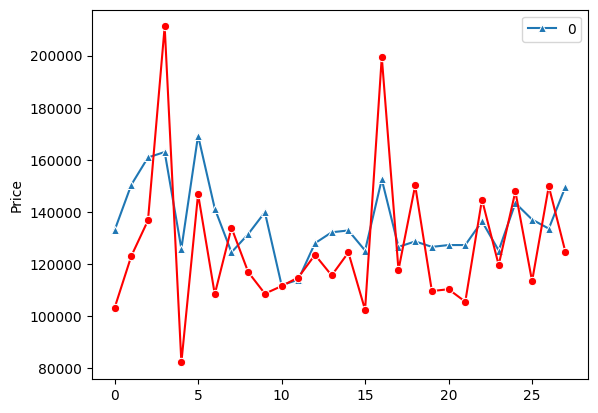

In [97]:
sns.lineplot(data=house_y_pred,marker='^',color='green')
sns.lineplot(data=house_y_test.reset_index(drop=True), marker='o', color='red')

In [114]:
pd.DataFrame({'Predicted Price':[x[-1] for x in house_y_pred]})


,Predicted Price
0,132947.747842
1,150444.958484
2,160943.284870
3,163042.950147
4,125948.863585
5,169341.945978
6,141346.408950
7,124549.086734
8,131547.970991
9,139946.632099


In [115]:
house_x_test.reset_index(drop=True)

,SqFt
0,2010
1,2260
2,2410
3,2440
4,1910
5,2530
6,2130
7,1890
8,1990
9,2110


In [128]:
data=pd.concat((house_x_test.reset_index(drop=True),pd.DataFrame({'Predicted Price':[x[-1] for x in house_y_pred]})),axis=1)

<Axes: xlabel='SqFt', ylabel='Price'>

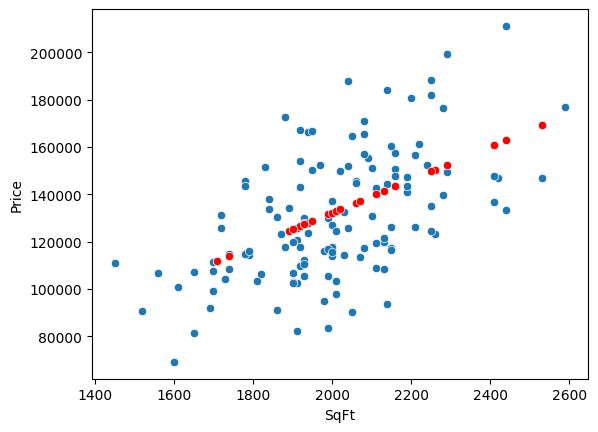

In [134]:
sns.scatterplot(data=df,x='SqFt',y='Price')
sns.scatterplot(data=data,x='SqFt',y='Predicted Price',color='r')